In [33]:
import random
import numpy as np
import matplotlib.pyplot as plt
import warnings

%matplotlib inline

warnings.filterwarnings('ignore')

In [34]:
from graphviz import Digraph

In [35]:
from comp_graph_node import Node
from neural_network import Neuron, Layer, MLP 

In [36]:
np.random.seed(1337)
random.seed(1337)

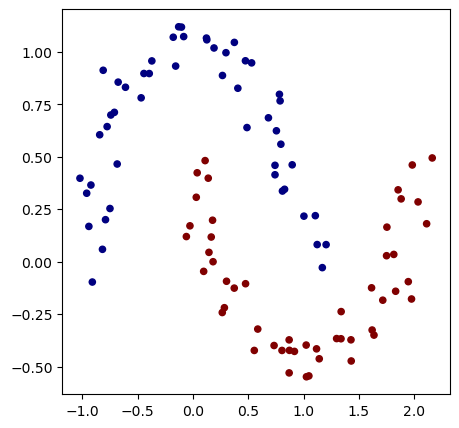

In [37]:
from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [38]:
# initialize a model 
model = MLP(2, [16, 16, 1]) # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))

MLP (Layer (ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2), Layer (ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16), Layer (ReLU - Neurônio 16))
number of parameters 337


In [39]:
def loss(batch_size=None):
    # Data Loader para computar a loss
    if batch_size is None:
        Xb, yb = X,y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    
    inputs = [list(map(Node, xrow)) for xrow in Xb]

    scores = list(map(model, inputs))

    # max-margin loss
    losses = [(1 + -yi * score_i).sigmoid() for yi, score_i in zip(yb, scores)]
    print(losses[0])
    
    data_loss = sum(losses) * (1.0 / len(losses))

    # Regularização L2
    alpha = 1e-4
    reg_loss = alpha * sum((param * param for param in model.parameters()))
    total_loss = data_loss + reg_loss

    # accuracy score
    accuracy = [(yi > 0) == (score_i.scalar > 0) for yi, score_i in zip(yb, scores)]

    return total_loss, sum(accuracy) / len(accuracy)

In [40]:
n_epochs = 100
# optimization
for epoch in range(n_epochs):
    # forward
    total_loss, acc = loss()
    
    # backward
    model.clear_gradient()
    total_loss.backward_propagation()

    # update (sgd)
    learning_rate = 1.0 - 0.9 * n_epochs / 100
    
    for param in model.parameters():
        param.scalar -= learning_rate * param.gradient
    
    if epoch % 1 == 0:
        print(f"step {epoch} loss {total_loss.scalar}, accuracy {acc*100}%")

Node(scalar=0.680771683063955, gradient=0)
step 0 loss 0.69313112544399, accuracy 50.0%
Node(scalar=0.9999961253077208, gradient=0)
step 1 loss 0.21606562516644112, accuracy 81.0%
Node(scalar=0.010079550427981372, gradient=0)
step 2 loss 0.2711120344892175, accuracy 75.0%
Node(scalar=0.9999999999824469, gradient=0)
step 3 loss 0.23103228390484634, accuracy 79.0%
Node(scalar=0.9999999999864169, gradient=0)
step 4 loss 0.22443078664594623, accuracy 79.0%
Node(scalar=0.9999999999453251, gradient=0)
step 5 loss 0.20218387124822473, accuracy 82.0%
Node(scalar=0.9999999999358975, gradient=0)
step 6 loss 0.19493824407832466, accuracy 82.0%
Node(scalar=0.9999999999049634, gradient=0)
step 7 loss 0.18815220353566092, accuracy 83.0%
Node(scalar=0.9999999991987878, gradient=0)
step 8 loss 0.17890440413603445, accuracy 84.0%
Node(scalar=0.9999999981956964, gradient=0)
step 9 loss 0.16867141213238, accuracy 86.0%
Node(scalar=0.9999999900643143, gradient=0)
step 10 loss 0.1391365188820314, accuracy 

KeyboardInterrupt: 

(-1.548639298268643, 1.951360701731357)

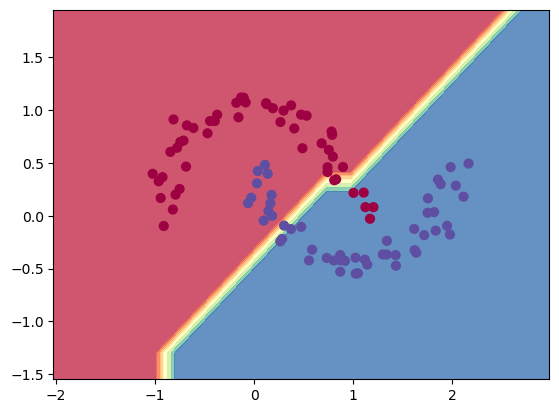

In [ ]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Node, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.scalar > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [ ]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [ ]:
digits = datasets.load_digits()

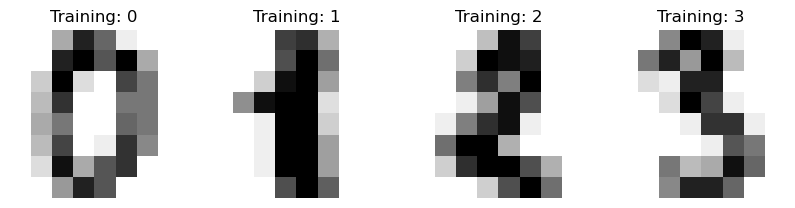

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [ ]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [ ]:
# just for testing
digits.target = digits.target[:10]
digits.data   = digits.data[:10]
digits.images = digits.images[:10]

In [ ]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [ ]:
digits.images.shape

(10, 8, 8)

In [ ]:
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)

In [ ]:
y_train_r = np.zeros((y_train.shape[0], 10))
y_train_r

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
y_train_r = np.zeros((y_train.shape[0], 10))
for i, y in enumerate(y_train):
    y_train_r[i][y] = 1

y_train_r

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [ ]:
# initialize a model 
model = MLP(64, [64, 32, 10]) # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))

MLP (Layer (ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,ReLU - Neurônio 64,

In [ ]:
# def softmax(x):
#   softmax_scores_sum = 0.0
#   for xi in x:
#     softmax_scores_sum += xi.exp()

#   softmax_scores = []
#   for xi in x:
#     softmax_scores.append(xi.exp() / softmax_scores_sum.scalar)
  
#   return softmax_scores

# param: list of nodes
def softmax(x): 
  

# def cross_entropy(y,y_pred):
#   loss = 0.0
#   for yi, y_predi in zip(y,y_pred):
#     for yii, y_predii in zip(yi, y_predi):
#       loss -= yii * y_predii.log()
  
#   return loss / float(len(y_pred))

SyntaxError: incomplete input (1871964648.py, line 22)

In [ ]:
def loss(X, y, batch_size=None):
    # Data Loader para computar a loss
    if batch_size is None:
        Xb, yb = [X],[y]
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    
    inputs = [list(map(Node, xrow)) for xrow in Xb]
    
    scores = list(map(model, inputs))
    print(scores)
    
    softmax_scores = list(map(softmax, scores))
    print(softmax_scores)
    
    # max-margin loss
    losses = cross_entropy(yb, softmax_scores)
    print("losses:")
    print(losses)

    # Regularização L2
    alpha = 1e-4
    reg_loss = alpha * sum((param * param for param in model.parameters()))
    total_loss = losses + reg_loss

    # accuracy score
    accuracy = [yi == max(score_i) for yi, score_i in zip(yb, softmax_scores)]
    
    print(total_loss)
    return total_loss, sum(accuracy) / len(yb)

In [ ]:
n_epochs = 100
# optimization
for epoch in range(n_epochs):
    # forward
    total_loss, acc = loss(X_train, y_train_r, 1)

    # backward
    model.clear_gradient()
    print("total loss é isso daqui:")
    print(total_loss)

    total_loss.backward_propagation()

    # # update (sgd)
    # learning_rate = 1.0 - 0.9 * n_epochs / 100
    
    # for param in model.parameters():
    #     param.scalar -= learning_rate * param.gradient
    
    # if epoch % 1 == 0:
    #     print(f"step {epoch} loss {total_loss.scalar}, accuracy {acc*100}%")

[[Node(scalar=19.35065078275143, gradient=0), Node(scalar=-9.551356723950974, gradient=0), Node(scalar=258.5330217080121, gradient=0), Node(scalar=-281.40787141561987, gradient=0), Node(scalar=54.693999902613854, gradient=0), Node(scalar=-234.30104129988482, gradient=0), Node(scalar=-82.62397740063304, gradient=0), Node(scalar=162.4950182066753, gradient=0), Node(scalar=-529.2915491679739, gradient=0), Node(scalar=260.68538774389964, gradient=0)]]
[[Node(scalar=1.3864683939297748e-105, gradient=0), Node(scalar=3.8898029174609292e-118, gradient=0), Node(scalar=0.10411033290435999, gradient=0), Node(scalar=3.3430540455332477e-236, gradient=0), Node(scalar=3.09978425896369e-90, gradient=0), Node(scalar=9.602399641914435e-216, gradient=0), Node(scalar=7.159647812629243e-150, gradient=0), Node(scalar=2.0357238350049113e-43, gradient=0), Node(scalar=0.0, gradient=0), Node(scalar=0.8958896670956399, gradient=0)]]
losses:
Node(scalar=nan, gradient=0)
Node(scalar=nan, gradient=0)
total loss é i

c:\Users\bmarquescost\Desktop\usp\data\autograd-lib\comp_graph_node.py:87: RuntimeWarning: divide by zero encountered in log
  res = Node(np.log(self.scalar), f'log(x)')
c:\Users\bmarquescost\Desktop\usp\data\autograd-lib\comp_graph_node.py:45: RuntimeWarning: invalid value encountered in double_scalars
  res = Node(self.scalar * b.scalar, (self, b), '*')
C:\Users\bmarquescost\AppData\Local\Temp\ipykernel_12636\695878672.py:16: RuntimeWarning: invalid value encountered in multiply
  loss -= yii * y_predii.log()


RecursionError: maximum recursion depth exceeded while calling a Python object